# random imputation
## easy to  implement
## variance of data remain same as data randomly filled from data given at Nan but covariance disturb
## but not in sklearn so do by pandas
## memory heavy at deployement 
## well suited for linear models

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [3]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [4]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [5]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [6]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [7]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [8]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

Series([], Name: Age_imputed, dtype: float64)

In [9]:
#148 randomly generated values
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([29.  , 50.  , 23.  , 27.  , 45.  , 23.  , 17.  , 70.  , 31.  ,
       16.  , 30.  , 37.  , 30.  , 36.  , 21.  ,  0.42, 16.  , 47.  ,
       28.5 , 40.  , 26.  , 31.  , 36.  , 16.  , 45.  , 48.  , 70.5 ,
       60.  , 24.  , 29.  , 24.  , 21.  , 31.  , 29.  , 32.5 , 19.  ,
       51.  , 47.  , 40.  , 39.  , 23.5 , 39.  , 14.  , 19.  , 16.  ,
       36.  , 31.  , 42.  , 30.  , 61.  , 32.  , 38.  , 24.  , 39.  ,
       34.  , 25.  , 62.  ,  1.  , 43.  ,  0.75, 47.  , 24.  , 25.  ,
       41.  ,  9.  , 40.  , 18.  , 36.  , 31.  , 40.5 , 19.  , 46.  ,
       35.  , 33.  ,  3.  , 34.  , 12.  , 15.  , 58.  , 52.  , 11.  ,
        9.  , 19.  , 35.  , 17.  , 25.  , 30.  , 33.  , 18.  ,  9.  ,
       29.  , 32.  , 21.  , 25.  , 18.  , 36.  ,  2.  , 39.  , 22.  ,
       13.  , 20.  , 29.  , 43.  , 27.  , 40.  , 43.  , 20.  , 28.  ,
       33.  , 36.  , 44.  , 40.  , 42.  , 60.  , 27.  , 22.  , 30.  ,
       36.  , 48.  , 32.  , 18.  , 25.  , 24.  , 32.5 ,  0.67, 62.  ,
       53.  , 22.  ,

In [10]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 9.  , 54.  , 36.  , 34.  , 37.  ,  3.  ,  9.  , 45.5 , 36.  ,
       41.  , 21.  ,  1.  , 21.  , 29.  , 30.  , 39.  , 30.  , 19.  ,
       32.  , 19.  , 39.  , 20.  , 44.  , 25.  ,  2.  , 36.  , 21.  ,
       16.  , 21.  , 31.  , 20.  ,  4.  , 28.  , 50.  ,  0.83, 25.  ,
       26.  , 37.  , 45.  , 33.  , 31.  , 39.  , 26.  , 26.  , 16.  ,
       30.  ,  7.  , 27.  , 22.  , 46.  , 23.  , 31.  , 39.  , 25.  ,
       38.  , 39.  , 32.  , 32.  , 13.  , 27.  , 16.  , 47.  , 46.  ,
       33.  , 30.  ,  2.  , 14.  , 33.  , 28.5 , 33.  ,  4.  ,  0.83,
       31.  , 28.  , 52.  ,  0.42, 42.  , 70.5 , 26.  , 52.  , 24.  ,
       40.  , 20.  , 45.  , 32.  , 29.  , 21.  , 29.  , 24.  , 60.  ,
       20.  , 25.  ,  8.  , 36.  , 45.  , 42.  , 28.  , 28.  , 14.5 ,
       23.  , 34.  , 42.  , 19.  , 27.  , 28.  , 33.  , 15.  , 61.  ,
       16.  , 27.  , 27.  , 45.  , 17.  , 36.  , 32.  , 16.  , 30.  ,
        6.  , 43.  , 16.  ,  5.  ,  2.  , 43.  , 38.  , 21.  , 36.  ,
       23.  , 32.  ,

In [11]:
X_train['Age'].isnull().sum()

148

In [12]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,2.0
493,71.0,49.5042,71.0
527,NaN,221.7792,25.0


C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

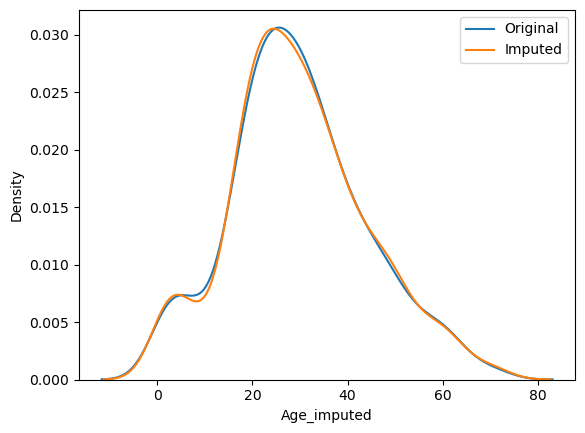

In [13]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [14]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  206.65822122011252


In [15]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,57.981761
Age,71.512440,204.349513,204.349513
Age_imputed,57.981761,204.349513,206.658221


<Axes: >

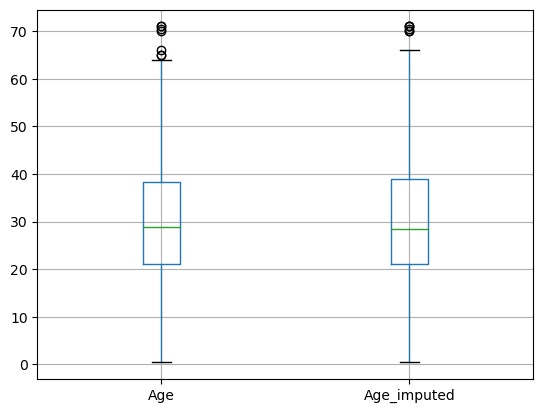

In [16]:
X_train[['Age', 'Age_imputed']].boxplot()

In [18]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [19]:

data = pd.read_csv('dataset/house-trainn.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [20]:

data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [21]:
X = data
y = data['SalePrice']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [23]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [24]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\856878696.py:4: SettingWithCop

In [25]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [26]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

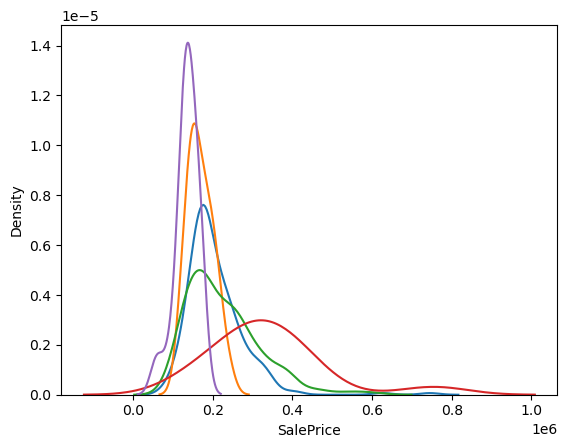

In [27]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_21300\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

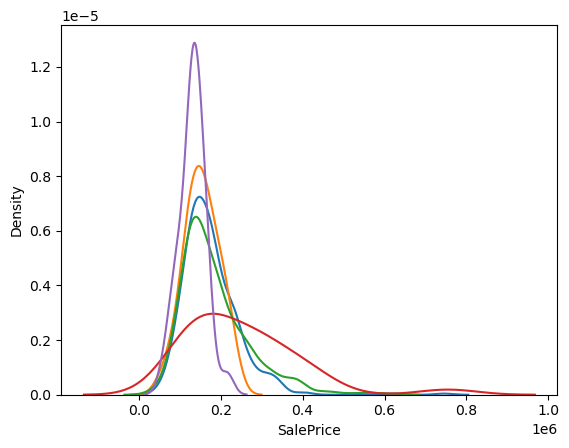

In [28]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

#at fireplace random imputation is not good as frequency change